In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd

In [2]:
num_video = 100
fps = 200
suffix = 'DLC_resnet50_FrontVideoProcessingAug19shuffle1_500000.csv'
y_max = 600

In [3]:
def traj_var(trajectories):
    trajectories = np.array(trajectories)
    template = np.mean(trajectories,axis=0)
    D = []
    for traj in trajectories:
        distances = []
        for idx, point in enumerate(traj.T):
            distances.append(np.linalg.norm(template.T[idx]-point))
        D.append(np.mean(distances))
    return np.median(D)

1
n
2
mf


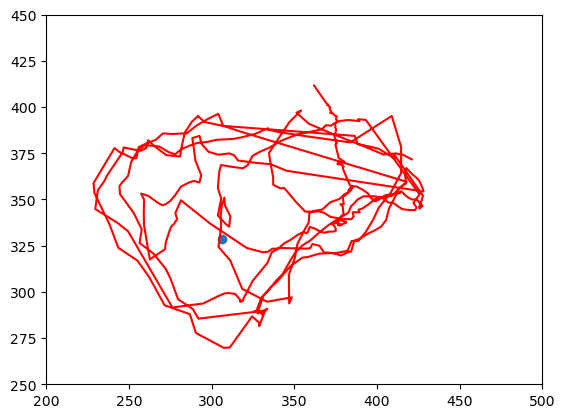

3
mf


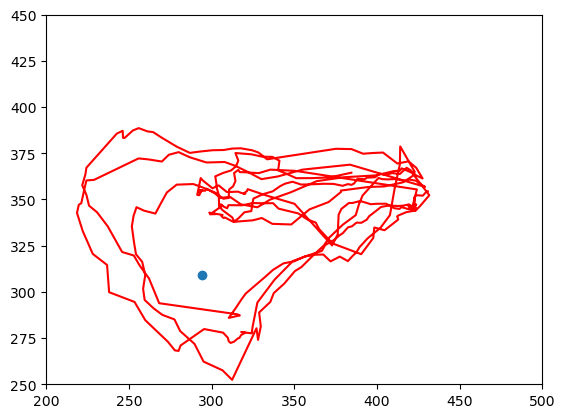

4
n
5
ss


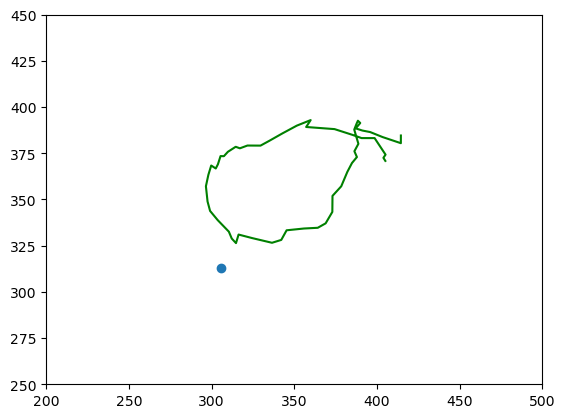

6
ms


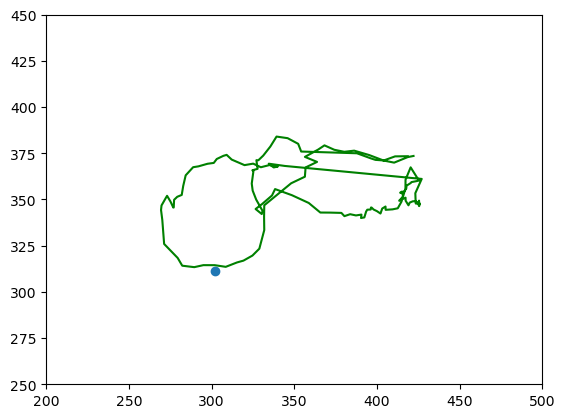

7
mf


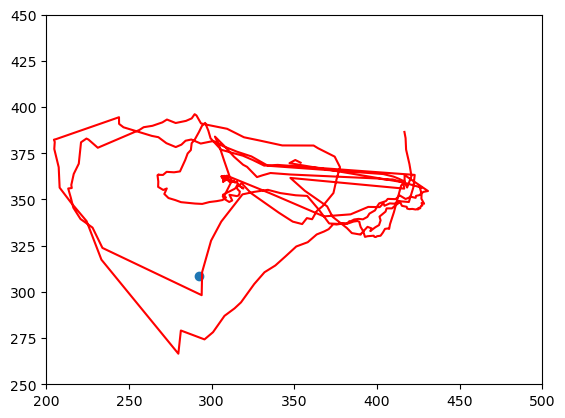

8
ms


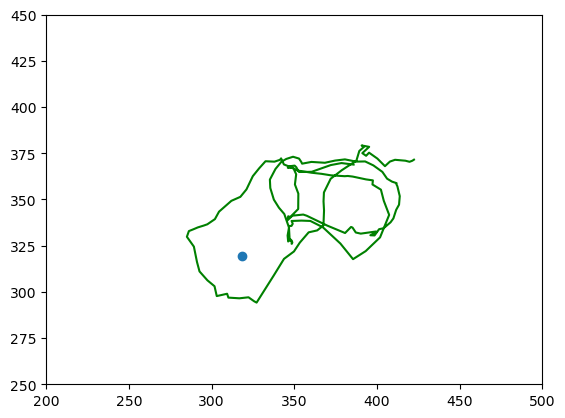

9
mf


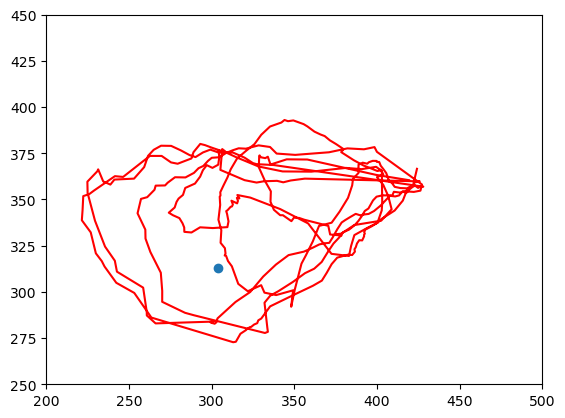

10
ms


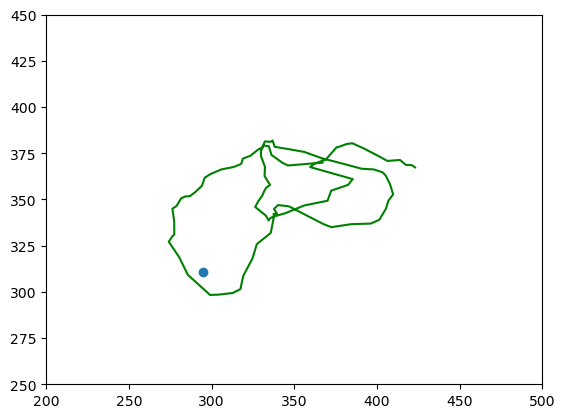

11
mf


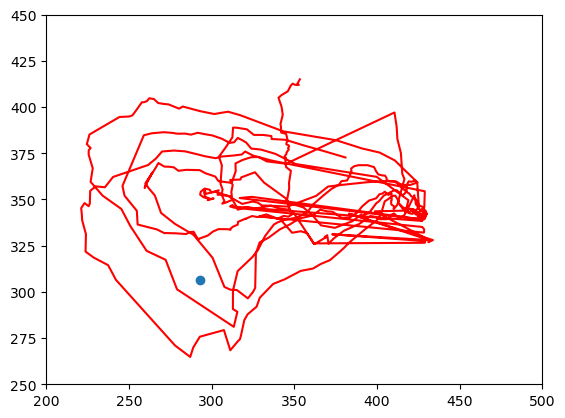

12
ms


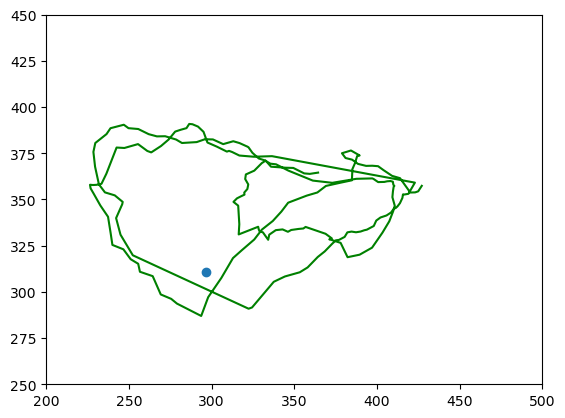

13
n
14
n
15
mf


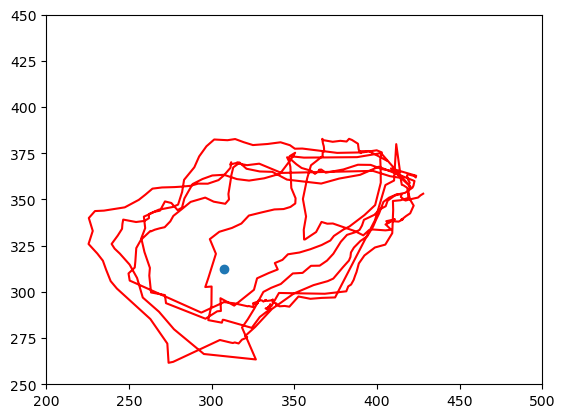

16
ss


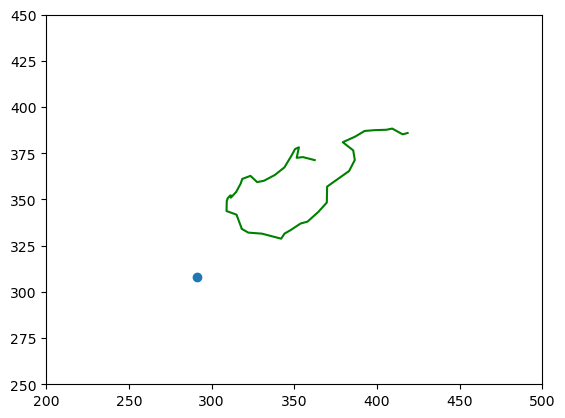

17
m
18
ms


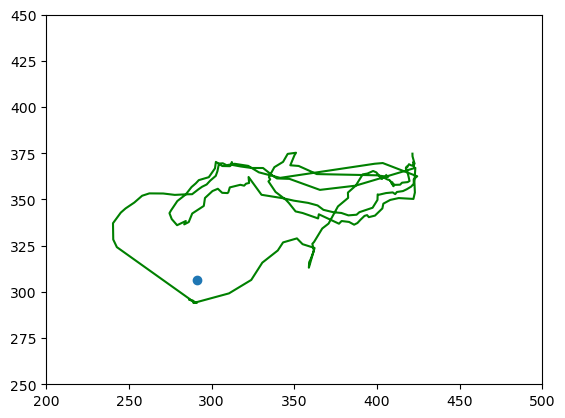

19
mf


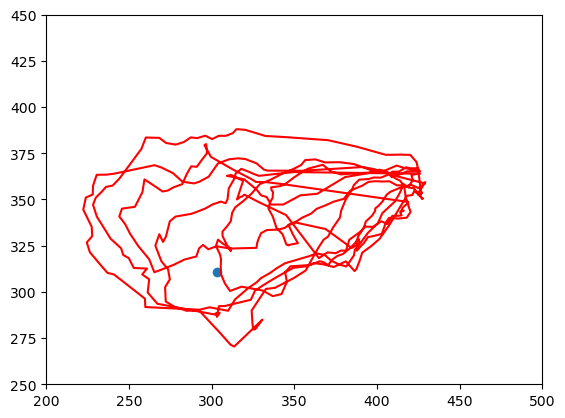

20
ms


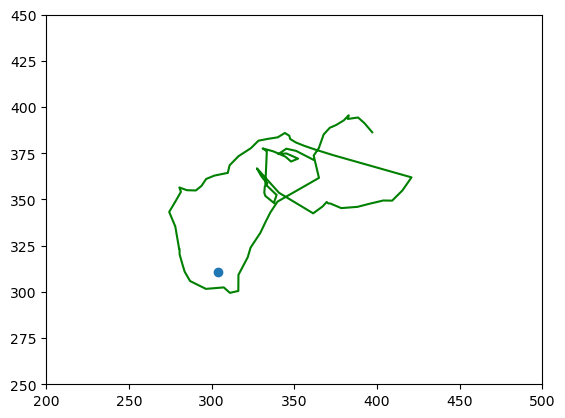

21
ms


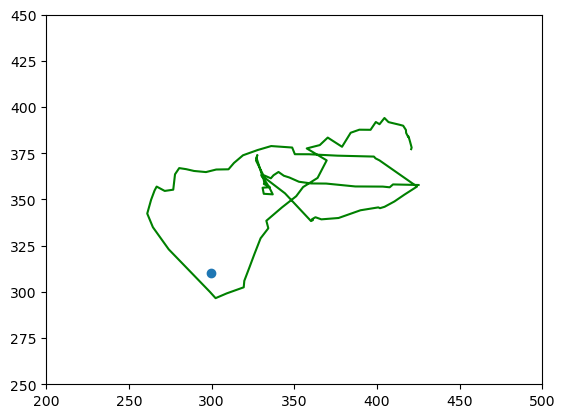

22
mf


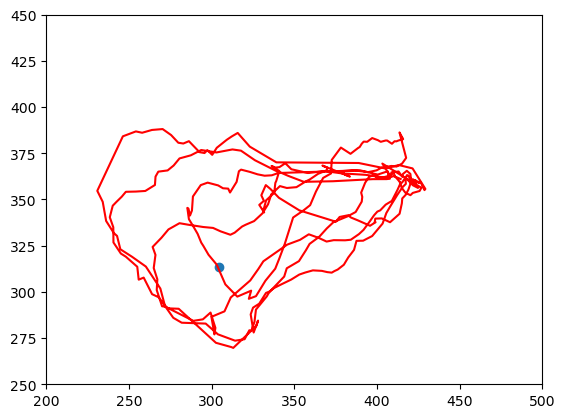

23
ss


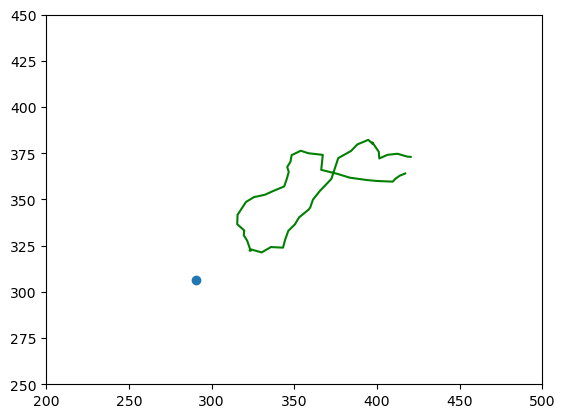

24
ms


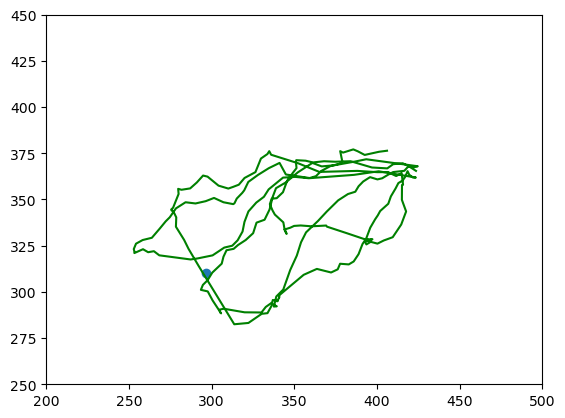

25
mf


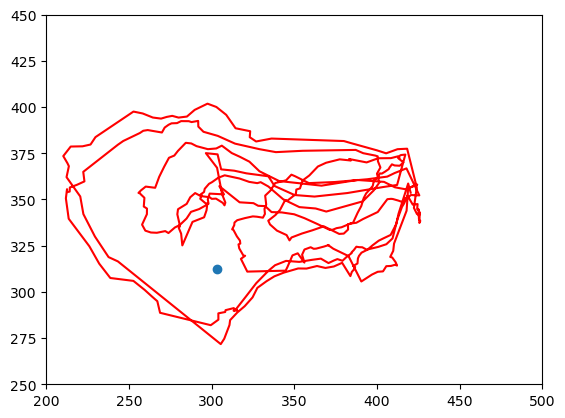

26
n
27
mf


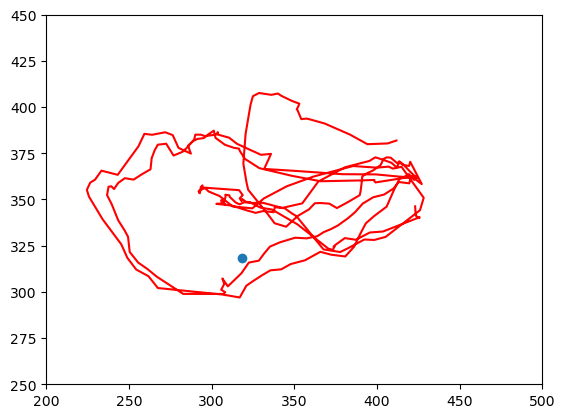

28
n
29
mf


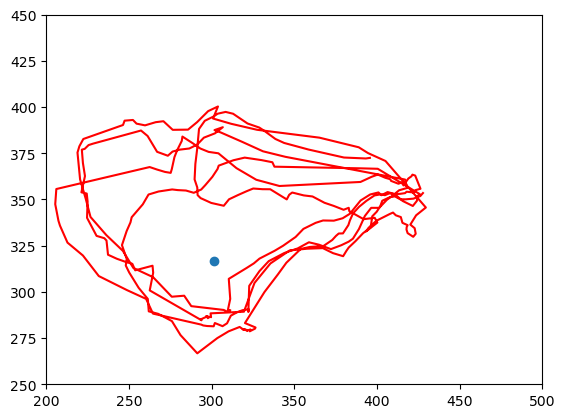

30
mf


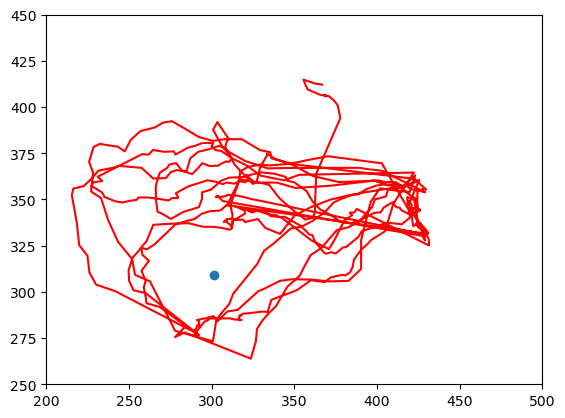

31
mf


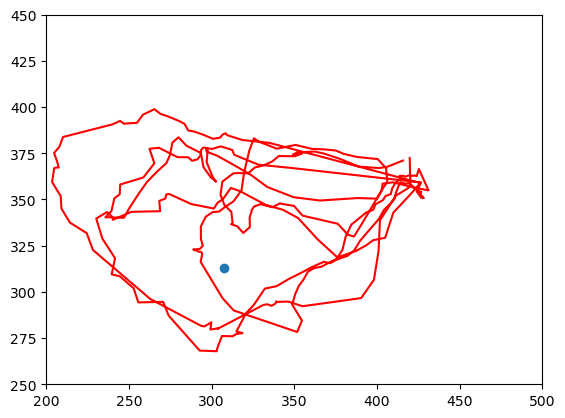

32
mf


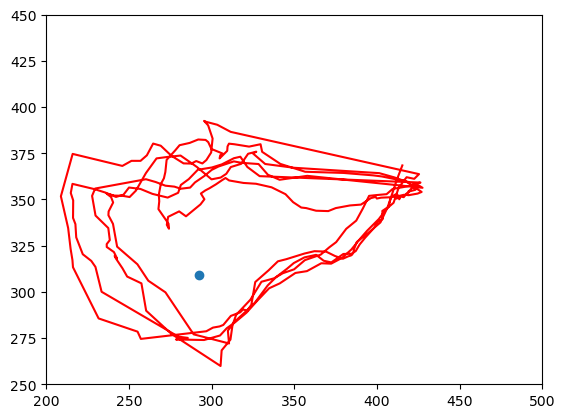

33
n
34
mf


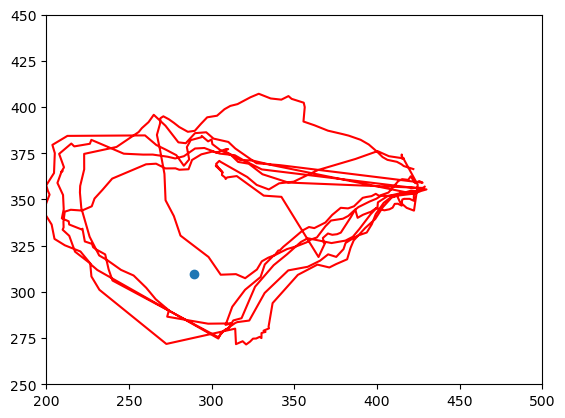

35
ss


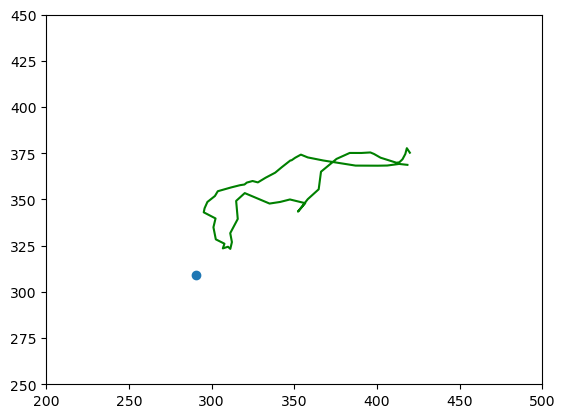

36
ms


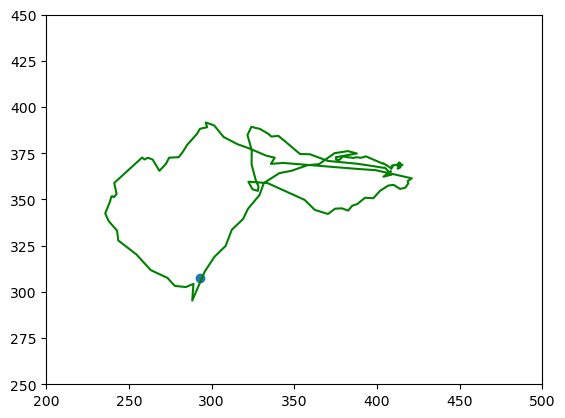

37
mf


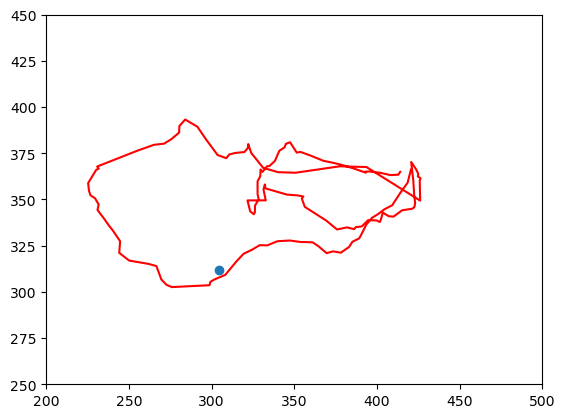

38
m
39
n
40
mf


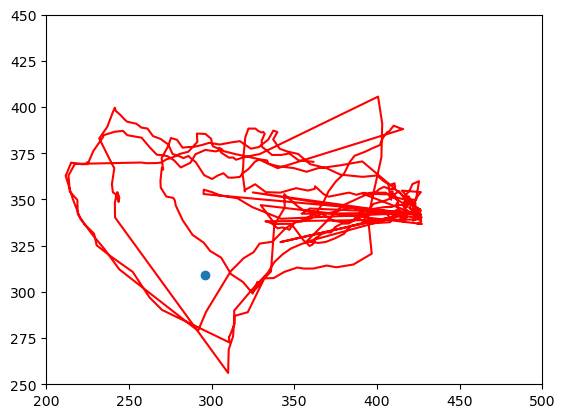

41
n
42
ss


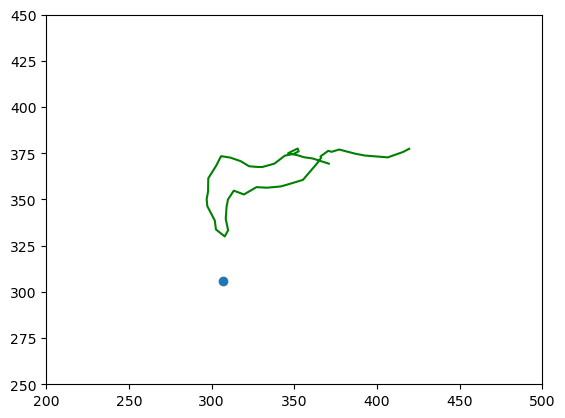

43
ms


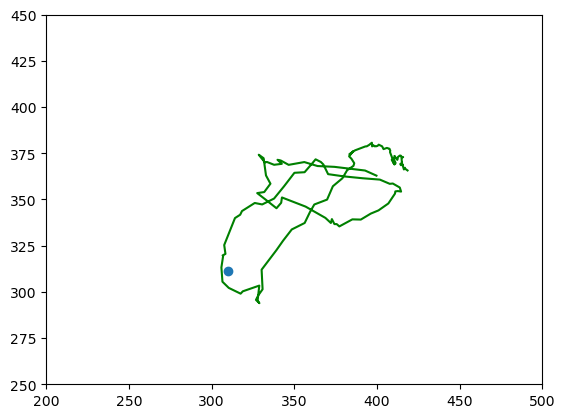

44
mf


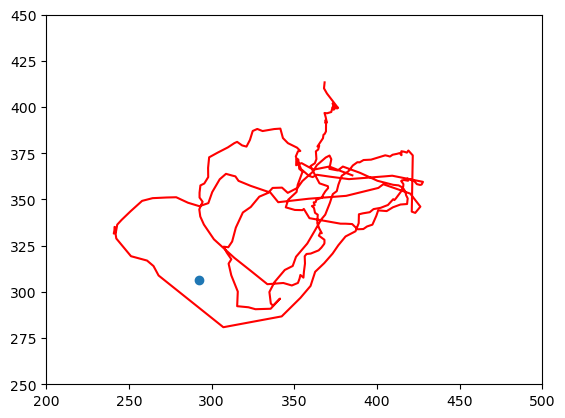

45
ms


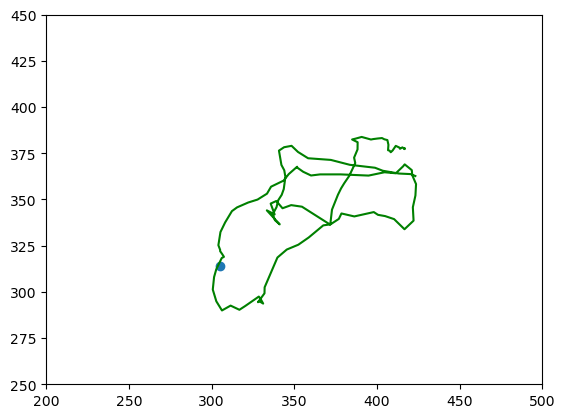

46
mf


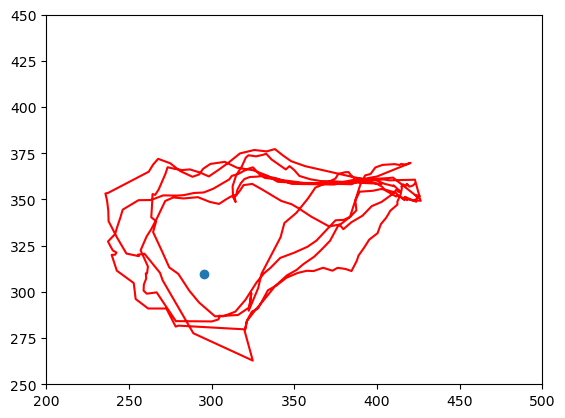

47
ms


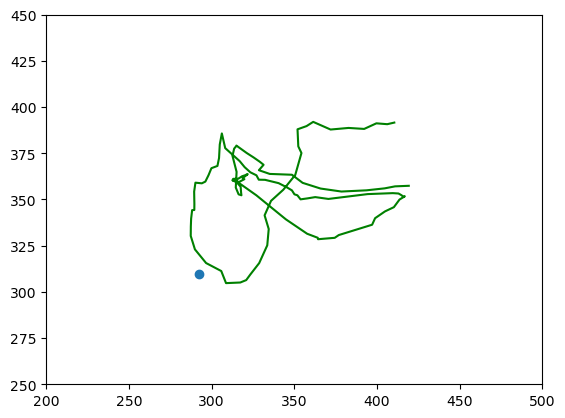

48
ms


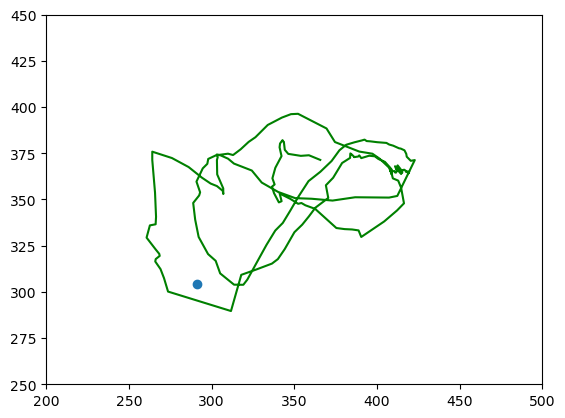

49
ms


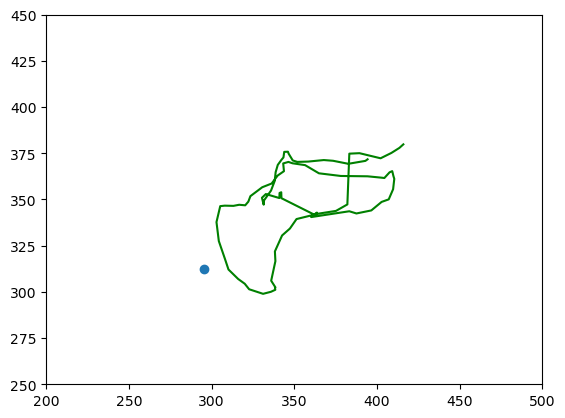

50
ms


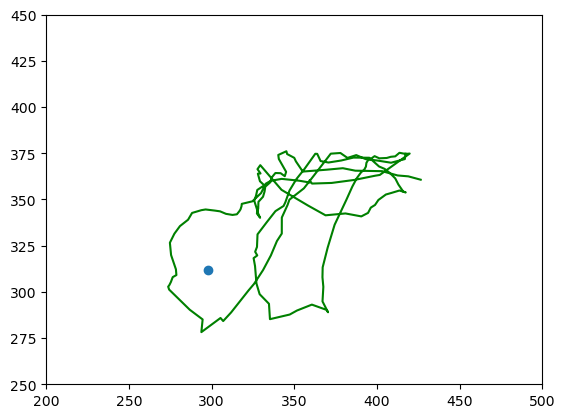

51
ms


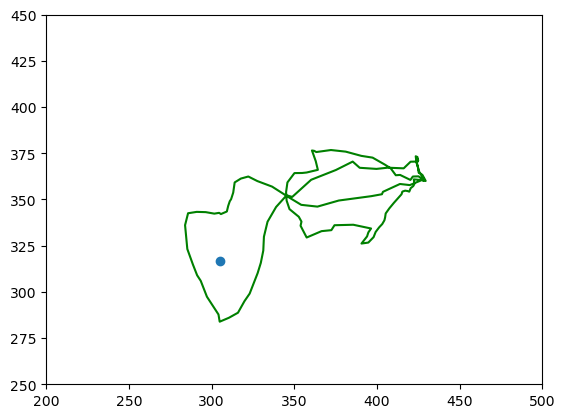

52
ms


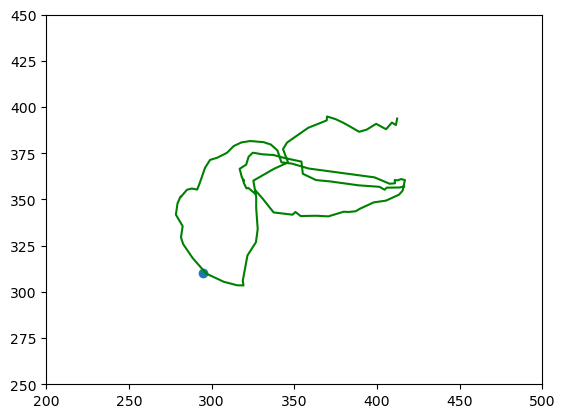

53
mf


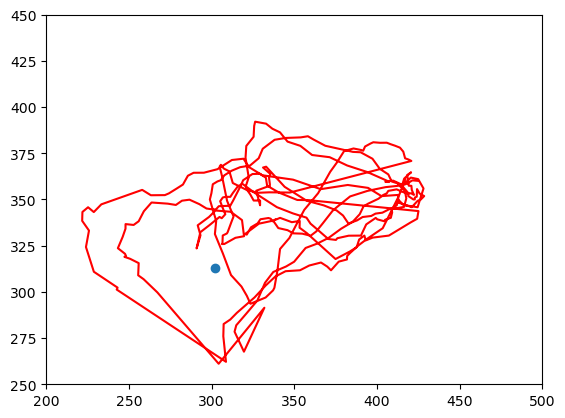

54
mf


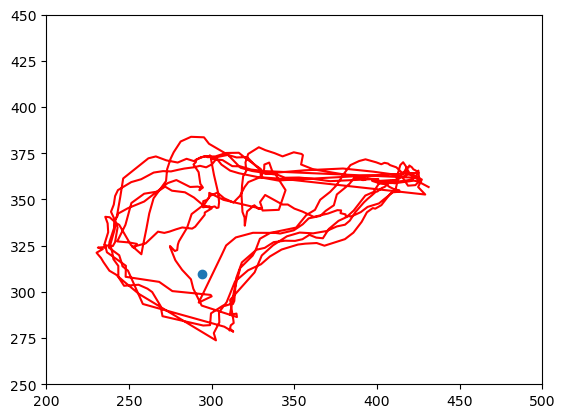

55
ss


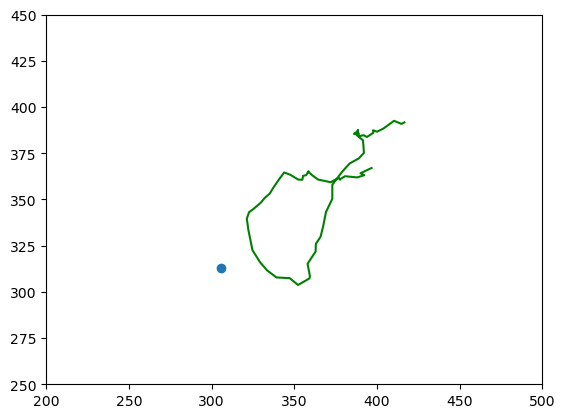

56
mf


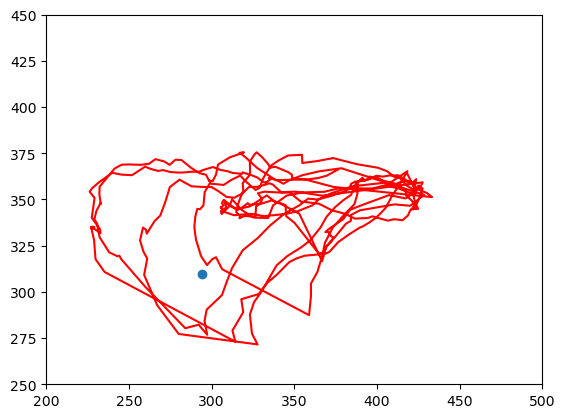

57
ss


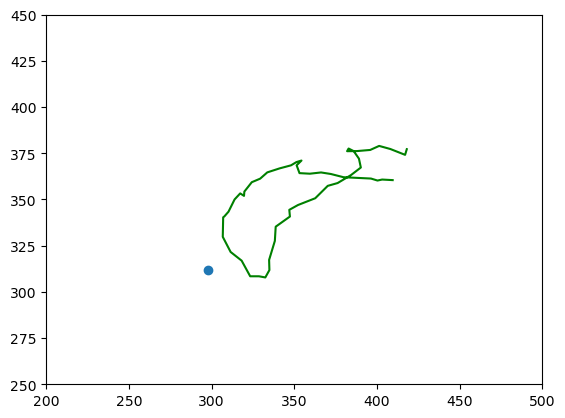

58
mf


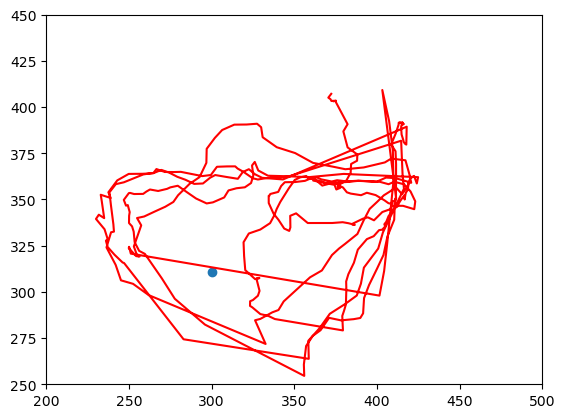

59
mf


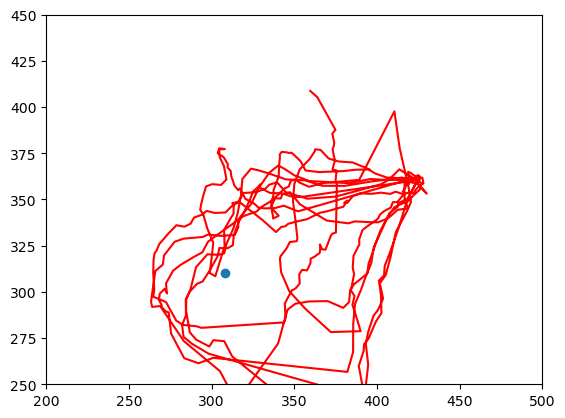

60
n
61
mf


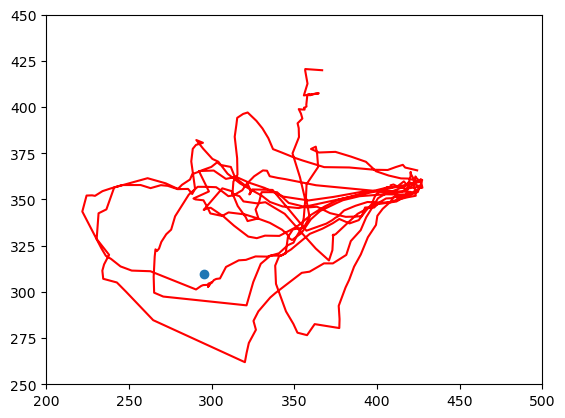

62
ss


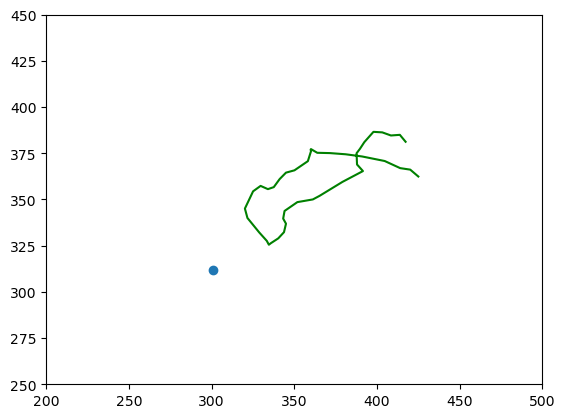

63
mf


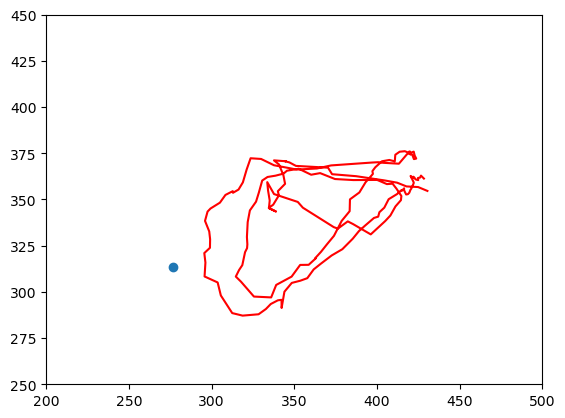

64
ms


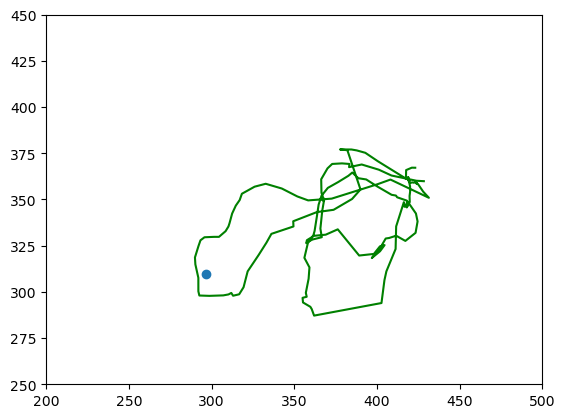

65
ms


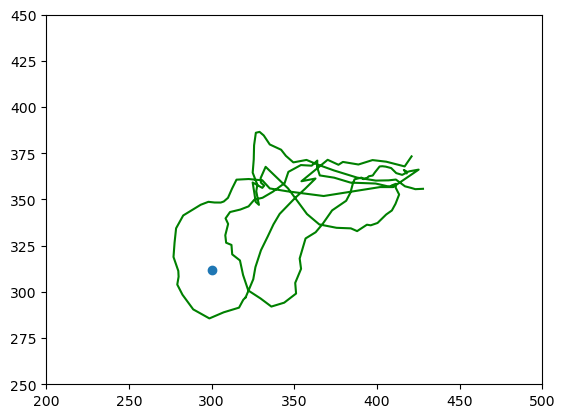

66
n
67
ss


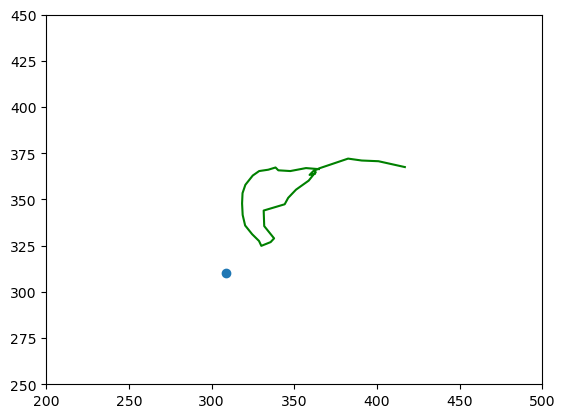

68
ms


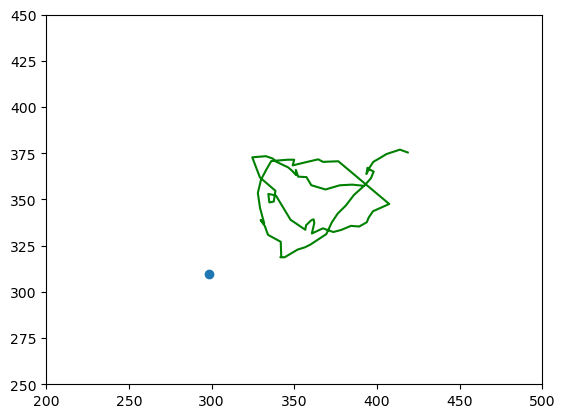

69
mf


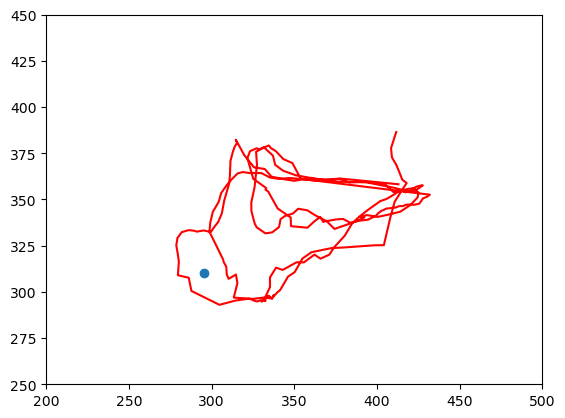

70
mf


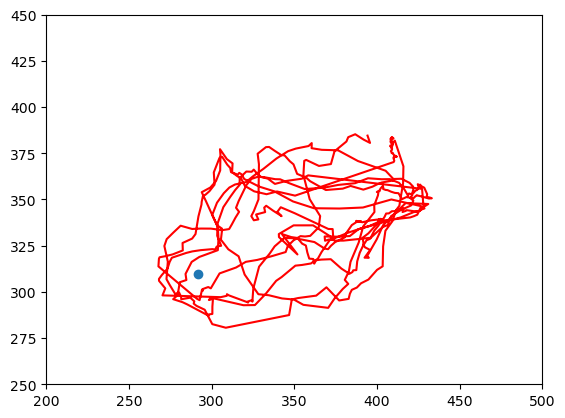

71
n
72
ms


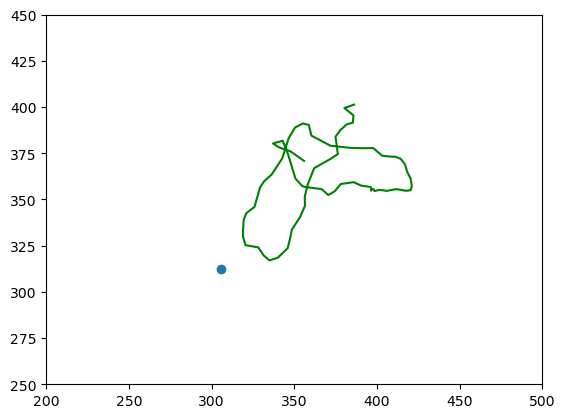

73
n
74
ms


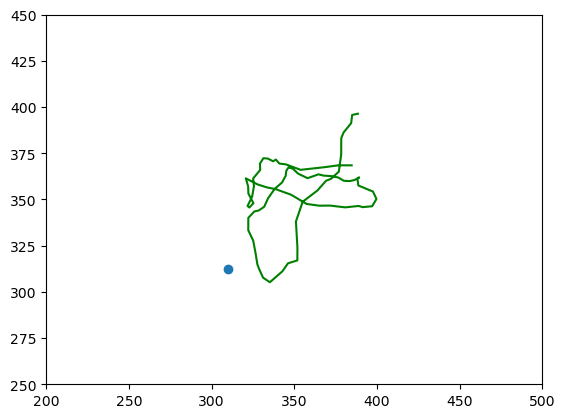

75
mf


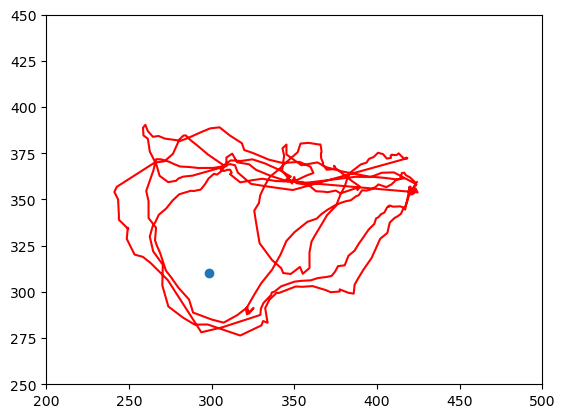

76
mf


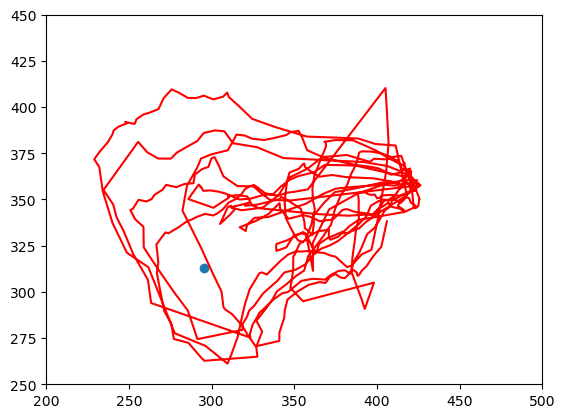

77
n
78
ms


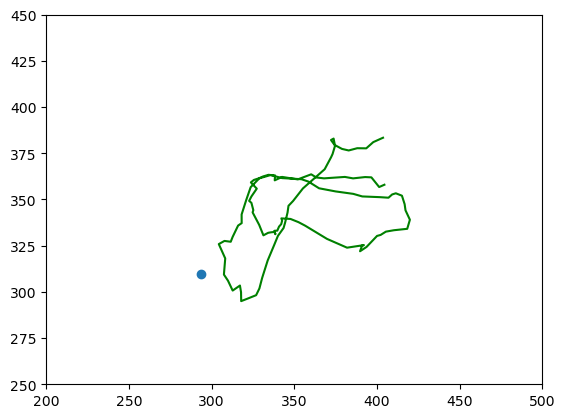

79
ms


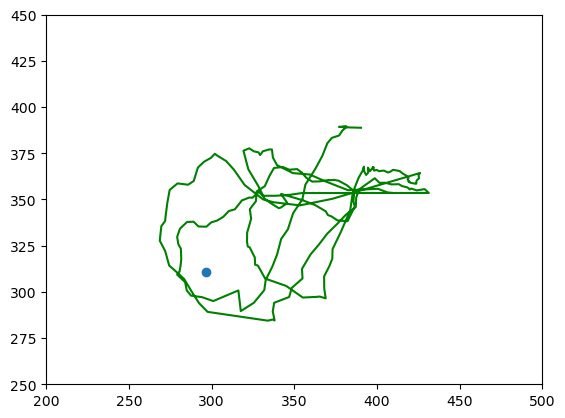

80
mf


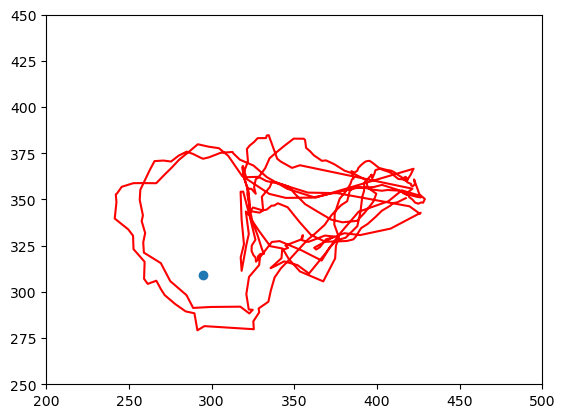

81
ms


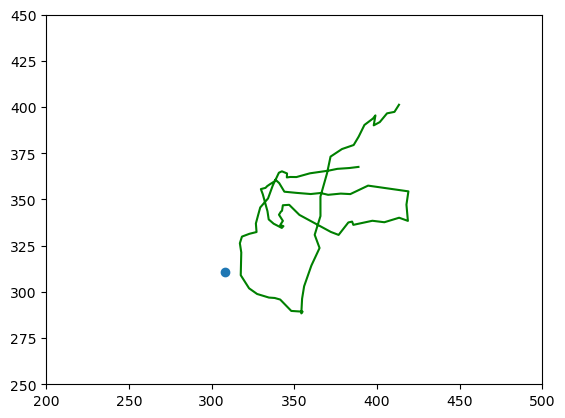

82
mf


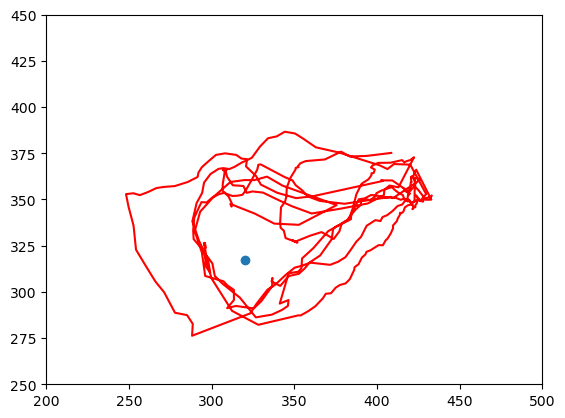

83
mf


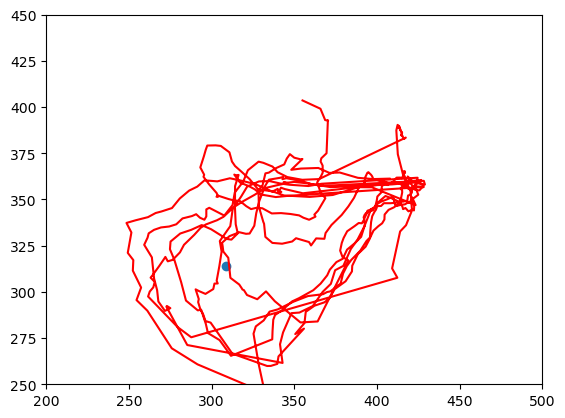

84
mf


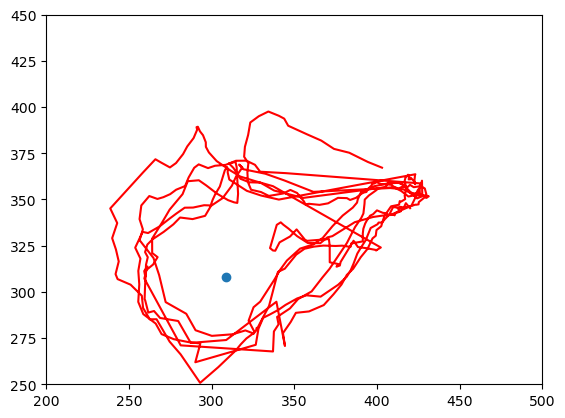

85
mf


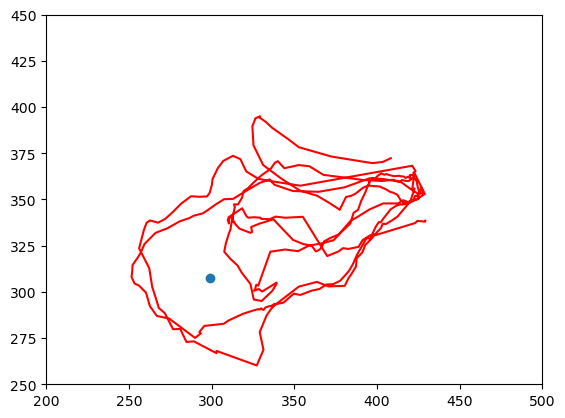

86
n
87
n
88
n
89
m
90
ms


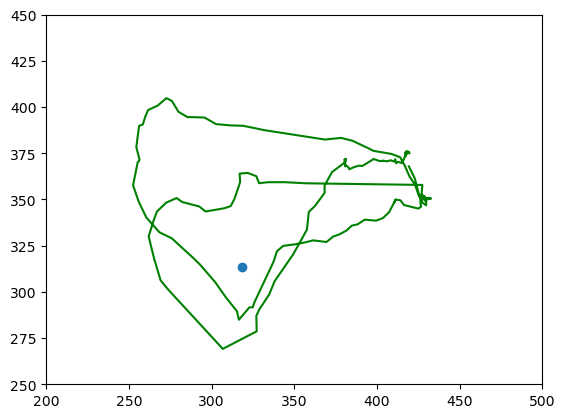

91
mf


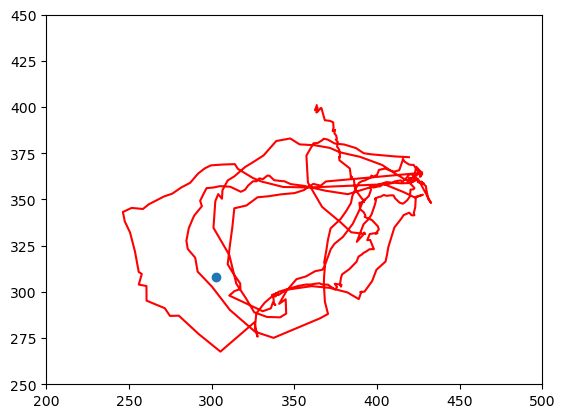

92
mf


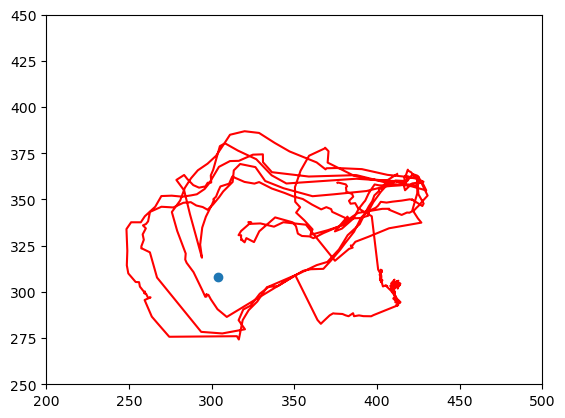

93
n
94
n
95
mf


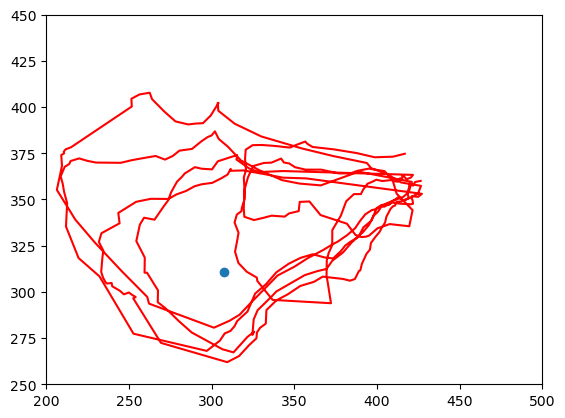

96
mf


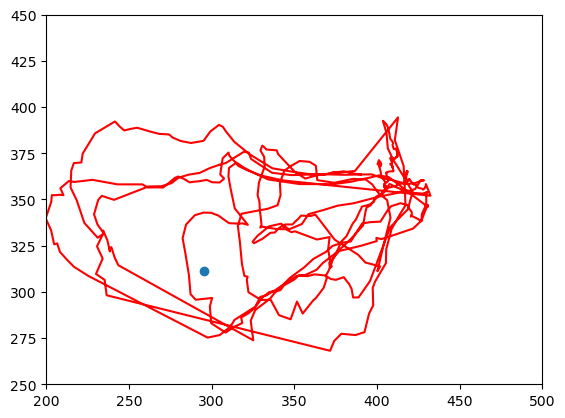

97
ss


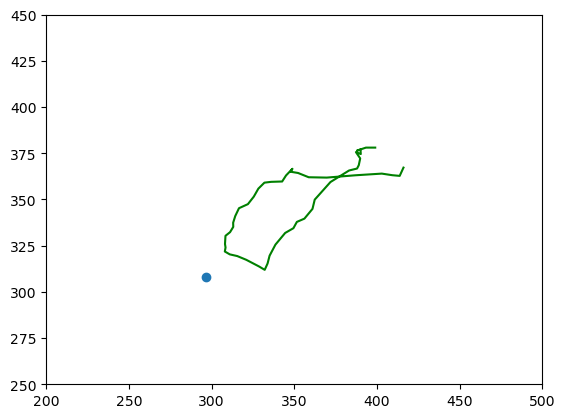

98
ms


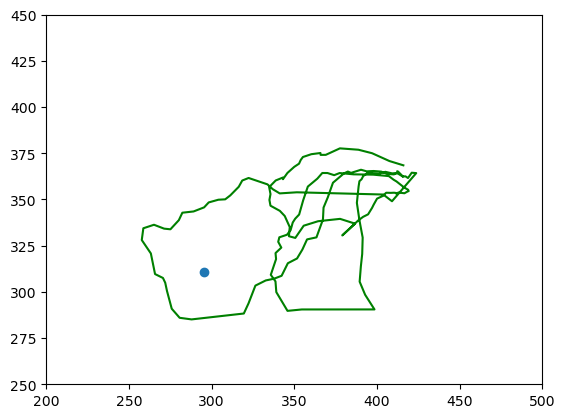

99
n
100
mf


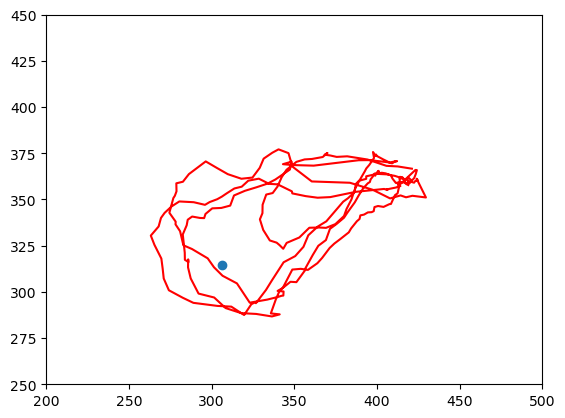

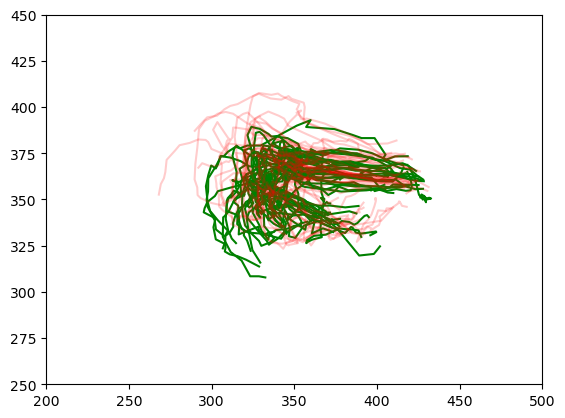

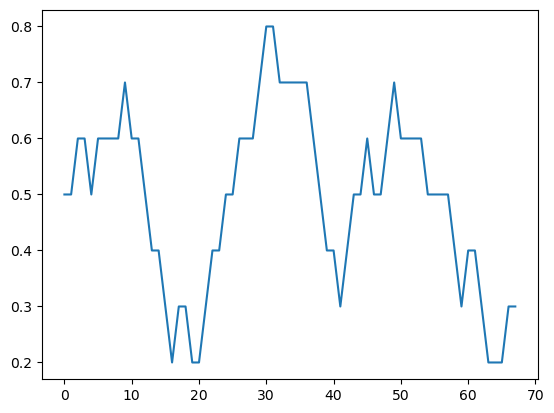

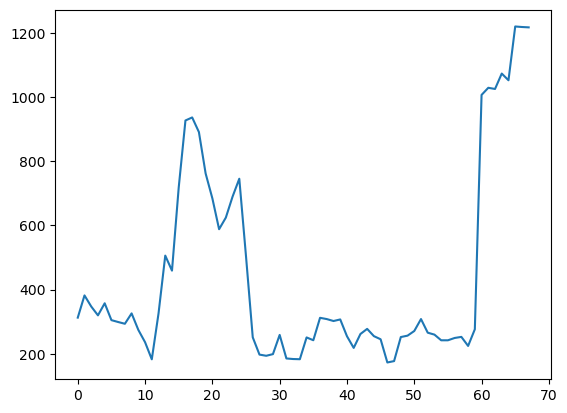

NameError: name 'Run_Success' is not defined

In [4]:
mouse = 'M2-1'
Sessions = ['2025-03-25','2025-03-26','2025-03-27','2025-03-28','2025-03-29','2025-03-30',
           '2025-04-01','2025-04-02','2025-04-03','2025-04-04','2025-04-05','2025-04-06']
Dates = ['25-Mar-2025','26-Mar-2025','27-Mar-2025','28-Mar-2025','29-Mar-2025','30-Mar-2025',
        '01-Apr-2025','02-Apr-2025','03-Apr-2025','04-Apr-2025','05-Apr-2025','06-Apr-2025']
n = 3
session = Sessions[n]
date = Dates[n]
path = 'G:/'+mouse+'/DLC/'+session+'/'
    
    
    
# Load behavior file
behav_file = 'G:/'+mouse+'/'+session+'/'+'behav_score.xlsx'
bf = pd.read_excel(behav_file, header=None)
label = np.squeeze(bf.values)
    
success = []
failure = []
end_points = []
trajectories = []
    
# Duration
duration = 30

for i in range(num_video):
    dlc_data_file_name = path+date+')-{v}-front'.format(v=i+1)+suffix
    all_files = os.listdir(path)
    if date+')-{v}-front'.format(v=i+1)+suffix not in all_files:
        continue
    print(i+1)
    print(label[i])
    dlc_data = pd.read_csv(dlc_data_file_name, header=2)
    
    px = []
    py = []
    # Paw: x.1
    detect_point = -1
    for idx, j in enumerate(range(len(dlc_data))):
        paw_x = dlc_data['x.1'].values[j]
        paw_y = y_max - dlc_data['y.1'].values[j]
        paw_p = dlc_data['likelihood.1'].values[j]
    
    
        if paw_p > 0.99:
            if detect_point == -1:
                detect_point = idx
                pellet_x = dlc_data['x'].values[j]
                pellet_y = dlc_data['y'].values[j]
                pellet_p = dlc_data['likelihood'].values[j]
            # plt.scatter(paw_x,paw_y,color='black',s=5)
            px.append(paw_x)
            py.append(paw_y)
    if label[i]=='ms' or label[i]=='ss':
        # print(label[i])
        # print(detect_point)
        success.append([px[:duration],py[:duration]])
        trajectories.append([px[:duration],py[:duration]])
        plt.plot(px[:],py[:],color='green')
            
        endpoint = [px[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)],
                        py[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)]]
        # plt.scatter(endpoint[0],endpoint[1])
            
            
        plt.scatter(pellet_x,pellet_y)
        plt.xlim((200,500))
        plt.ylim((250,450))
        plt.show()
    
        end_points.append(endpoint)
    elif label[i]=='mf' or label[i]=='sf':
        # print(label[i])
        # print(detect_point)
        failure.append([px[:duration],py[:duration]])
        trajectories.append([px[:duration],py[:duration]])
        plt.plot(px[:],py[:],color='red')
    
        endpoint = [px[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)],
                    py[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)]]
        # plt.scatter(endpoint[0],endpoint[1])
            
            
        plt.scatter(pellet_x,pellet_y)
        plt.xlim((200,500))
        plt.ylim((250,450))
        plt.show()
    
        end_points.append(endpoint)
    
for t in success:
    plt.plot(t[0],t[1],color='green')
for t in failure:
    plt.plot(t[0],t[1],color='red',alpha=.2)
    
plt.xlim((200,500))
plt.ylim((250,450))
plt.show()
end_points = np.array(end_points)
# traj_var(trajectories)
    
a = label == 'ss'
b = label == 'sf'
c = label == 'ms'
d = label == 'mf'
reach_label = label[a+b+c+d]
reach_label[reach_label == 'ss'] = 1
reach_label[reach_label == 'ms'] = 1
reach_label[reach_label == 'sf'] = 0
reach_label[reach_label == 'mf'] = 0
    
window = 10
run_success = []
run_var = []
trajectories_1 = []
trajectories_2 = []
for i in range(len(reach_label)-window+1):
    # if np.mean(reach_label[i:i+window]) <= 0.5:
    #     trajectories_1.append(trajectories[i+window])
    # else:
    #     trajectories_2.append(trajectories[i+window])
    
# for t in trajectories_1:
#     plt.plot(t[0],t[1],color='grey')
# plt.show()
# for t in trajectories_2:
#     plt.plot(t[0],t[1],color='grey')
# plt.show()
        
    run_success.append(np.mean(reach_label[i:i+window]))
    
    run_var.append(np.mean((end_points[i:i+window,0]-np.mean(end_points[i:i+window,0]))**2)+np.mean((end_points[i:i+window,1]-np.mean(end_points[i:i+window,1]))**2))
    
plt.plot(run_success)
plt.show()
plt.plot(np.array(run_var))
plt.show()

Run_Success = Run_Success+run_success
Run_Var = Run_Var+run_var

G:/M2-1/DLC/2025-03-25/
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


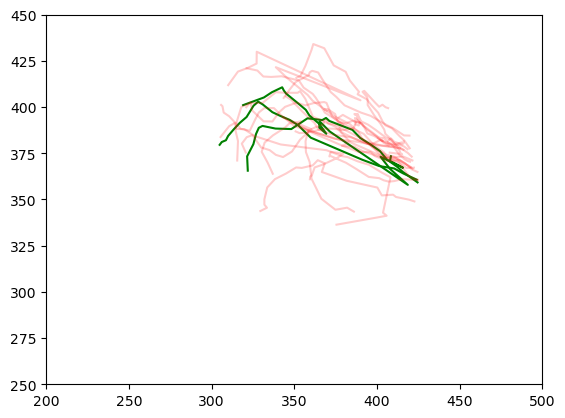

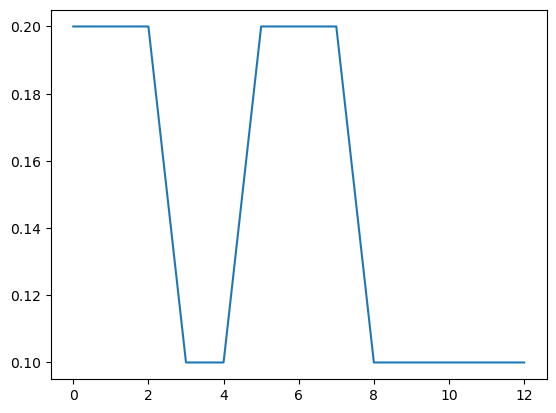

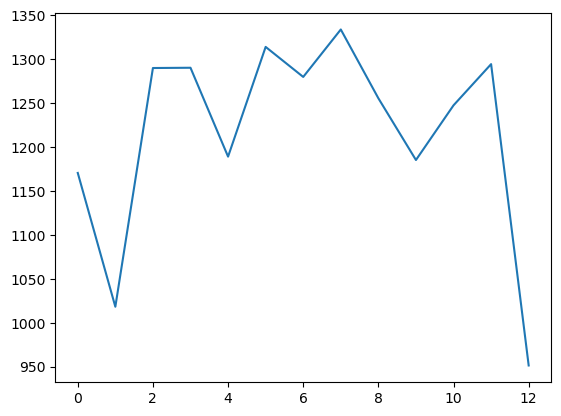

G:/M2-1/DLC/2025-03-26/
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


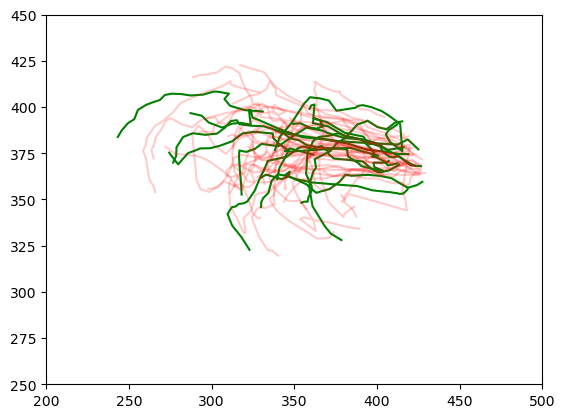

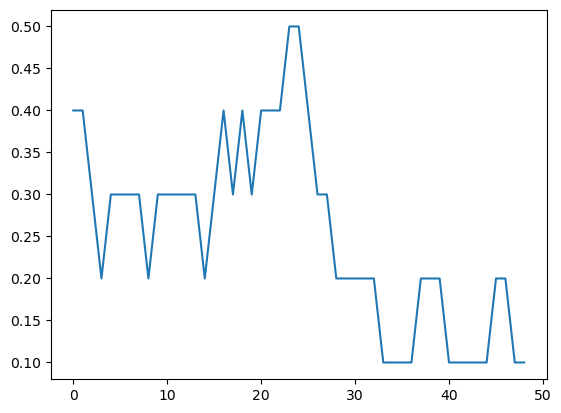

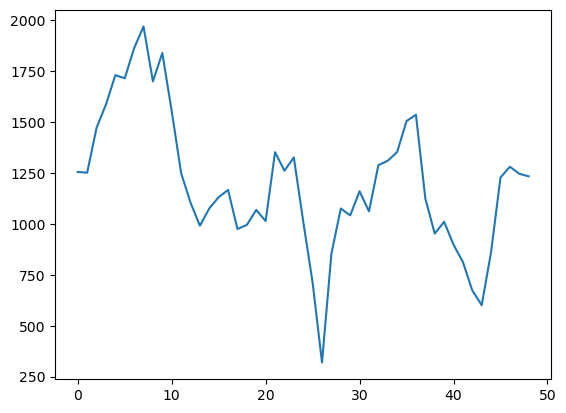

G:/M2-1/DLC/2025-03-27/
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


Exception ignored in: <function ZipFile.__del__ at 0x00000257D0453940>
Traceback (most recent call last):
  File "C:\Users\Ganguly Lab\anaconda3\envs\rastermap\lib\zipfile.py", line 1821, in __del__
    self.close()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [395]:
mouse = 'M2-1'
Sessions = ['2025-03-25','2025-03-26','2025-03-27','2025-03-28','2025-03-29','2025-03-30',
           '2025-04-01','2025-04-02','2025-04-03','2025-04-04','2025-04-05','2025-04-06']
Dates = ['25-Mar-2025','26-Mar-2025','27-Mar-2025','28-Mar-2025','29-Mar-2025','30-Mar-2025',
        '01-Apr-2025','02-Apr-2025','03-Apr-2025','04-Apr-2025','05-Apr-2025','06-Apr-2025']

# mouse = 'mPFC-3'
# Sessions = ['2025-07-03','2025-07-04','2025-07-05','2025-07-06','2025-07-07','2025-07-08',
#            '2025-07-09','2025-07-10','2025-07-11','2025-07-12','2025-07-13']
# Dates = ['03-Jul-2025','04-Jul-2025','05-Jul-2025','06-Jul-2025','07-Jul-2025','08-Jul-2025',
#         '09-Jul-2025','10-Jul-2025','11-Jul-2025','12-Jul-2025','13-Jul-2025']

Run_Success = []
Run_Var = []
for n in range(len(Sessions)):
    session = Sessions[n]
    date = Dates[n]
    path = 'G:/'+mouse+'/DLC/'+session+'/'
    print(path)
    
    
    
    # Load behavior file
    behav_file = 'G:/'+mouse+'/'+session+'/'+'behav_score.xlsx'
    bf = pd.read_excel(behav_file, header=None)
    label = np.squeeze(bf.values)
    
    success = []
    failure = []
    end_points = []
    trajectories = []
    
    # Duration
    duration = 20
    
    for i in range(num_video):
        dlc_data_file_name = path+date+')-{v}-front'.format(v=i+1)+suffix
        all_files = os.listdir(path)
        if date+')-{v}-front'.format(v=i+1)+suffix not in all_files:
            continue
        print(i+1)
        # print(label[i])
        dlc_data = pd.read_csv(dlc_data_file_name, header=2)
    
        px = []
        py = []
        # Paw: x.1
        detect_point = -1
        for idx, j in enumerate(range(len(dlc_data))):
            paw_x = dlc_data['x.1'].values[j]
            paw_y = y_max - dlc_data['y.1'].values[j]
            paw_p = dlc_data['likelihood.1'].values[j]
    
    
            if paw_p > 0.99:
                if detect_point == -1:
                    detect_point = idx
                    pellet_x = dlc_data['x'].values[j]
                    pellet_y = dlc_data['y'].values[j]
                    pellet_p = dlc_data['likelihood'].values[j]
                # plt.scatter(paw_x,paw_y,color='black',s=5)
                px.append(paw_x)
                py.append(paw_y)
        if label[i]=='ms' or label[i]=='ss':
            # print(label[i])
            # print(detect_point)
            success.append([px[:duration],py[:duration]])
            trajectories.append([px[:duration],py[:duration]])
            # plt.plot(px[:duration],py[:duration],color='green')
            
            endpoint = [px[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)],
                        py[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)]]
            # plt.scatter(endpoint[0],endpoint[1])
            
            
            # plt.scatter(pellet_x,pellet_y)
            # plt.xlim((200,500))
            # plt.ylim((250,450))
            # plt.show()
    
            end_points.append(endpoint)
        elif label[i]=='mf' or label[i]=='sf':
            # print(label[i])
            # print(detect_point)
            failure.append([px[:duration],py[:duration]])
            trajectories.append([px[:duration],py[:duration]])
            # plt.plot(px[:duration],py[:duration],color='red')
    
            endpoint = [px[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)],
                        py[np.argmin(np.array(px[:duration])**2+np.array(py[:duration])**2)]]
            # plt.scatter(endpoint[0],endpoint[1])
            
            
            # plt.scatter(pellet_x,pellet_y)
            # plt.xlim((200,500))
            # plt.ylim((250,450))
            # plt.show()
    
            end_points.append(endpoint)
    
    for t in success:
        plt.plot(t[0],t[1],color='green')
    for t in failure:
        plt.plot(t[0],t[1],color='red',alpha=.2)
    
    plt.xlim((200,500))
    plt.ylim((250,450))
    plt.show()
    end_points = np.array(end_points)
    # traj_var(trajectories)
    
    a = label == 'ss'
    b = label == 'sf'
    c = label == 'ms'
    d = label == 'mf'
    reach_label = label[a+b+c+d]
    reach_label[reach_label == 'ss'] = 1
    reach_label[reach_label == 'ms'] = 1
    reach_label[reach_label == 'sf'] = 0
    reach_label[reach_label == 'mf'] = 0
    
    window = 10
    run_success = []
    run_var = []
    trajectories_1 = []
    trajectories_2 = []
    for i in range(len(reach_label)-window+1):
        # if np.mean(reach_label[i:i+window]) <= 0.5:
        #     trajectories_1.append(trajectories[i+window])
        # else:
        #     trajectories_2.append(trajectories[i+window])
    
    # for t in trajectories_1:
    #     plt.plot(t[0],t[1],color='grey')
    # plt.show()
    # for t in trajectories_2:
    #     plt.plot(t[0],t[1],color='grey')
    # plt.show()
        
        run_success.append(np.mean(reach_label[i:i+window]))
    
        run_var.append(np.mean((end_points[i:i+window,0]-np.mean(end_points[i:i+window,0]))**2)+np.mean((end_points[i:i+window,1]-np.mean(end_points[i:i+window,1]))**2))
    
    plt.plot(run_success)
    plt.show()
    plt.plot(np.array(run_var))
    plt.show()

    Run_Success = Run_Success+run_success
    Run_Var = Run_Var+run_var

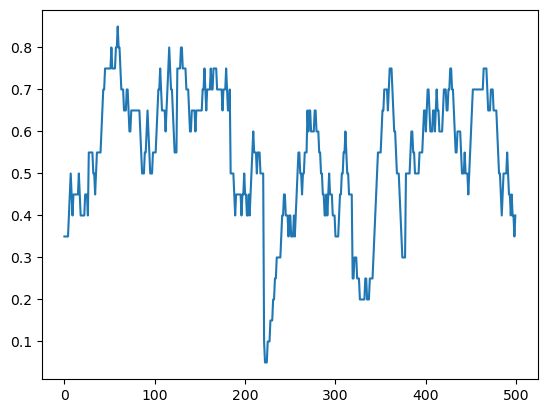

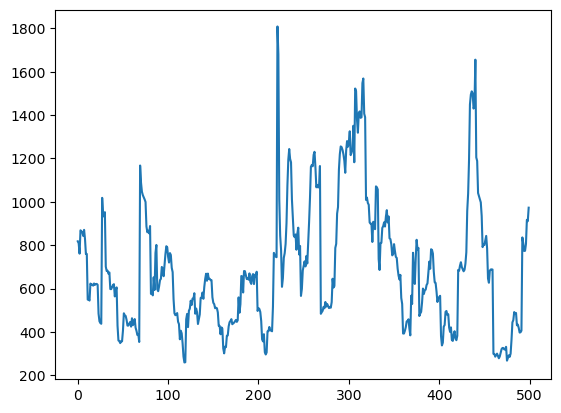

LinregressResult(slope=-946.1114071003701, intercept=1207.5143962161906, rvalue=-0.49837905081576633, pvalue=9.468905937642808e-33, stderr=73.7507613061872, intercept_stderr=41.676032521414896)


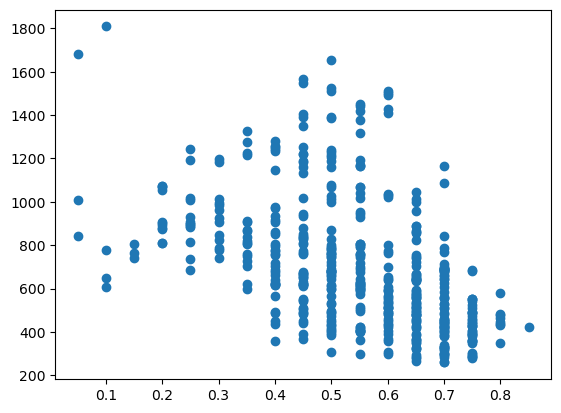

In [381]:
plt.plot(Run_Success)
plt.show()
plt.plot(Run_Var)
plt.show()

plt.scatter(Run_Success[:],Run_Var[:])
res = scipy.stats.linregress(Run_Success[:],Run_Var[:])
print(res)

# d = 10
# plt.scatter(Run_Success[:-d],Run_Var[d:])
# res = scipy.stats.linregress(Run_Success[:-d],Run_Var[d:])
# print(res)

In [294]:
# Compare DLC first detection of paw vs TTL pellet touch detection

[[352.3081359863281, 317.4714050292969, 313.2655944824219, 312.9612731933594, 311.2816162109375, 311.4331970214844, 308.2301940917969, 307.29833984375, 303.4034118652344, 303.6861572265625, 303.5168151855469, 307.3623962402344, 310.7660827636719, 314.6220703125, 313.080078125, 316.4600830078125, 318.2471618652344, 326.9942932128906, 330.0367126464844, 335.7978820800781], [372.3260040283203, 378.82359313964844, 383.5471649169922, 379.8028106689453, 377.5959777832031, 375.05201721191406, 371.7288055419922, 367.6234130859375, 357.5605773925781, 349.19358825683594, 346.41661071777344, 344.78121948242193, 347.71229553222656, 351.13621520996094, 358.615966796875, 362.81146240234375, 366.42474365234375, 366.02781677246094, 367.2658233642578, 366.1775360107422]]


27.301779592107383